# **1. Data Exploration and Visualization:**

***Data Preparation***

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Load the dataset
data = pd.read_csv('datasets_house_prices.csv')

In [24]:
print(data.head())
print(data.info())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64

***Data Exploration***

In [25]:
print(data.describe())

       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528   
50%    2430.500000     3.000000    47.000000                      15.239628   
75%    3254.250000     4.000000    74.000000                      22.765188   
max    3997.000000     5.000000    99.000000                      29.935715   

              Price  
count  1.000000e+03  
mean   7.190532e+05  
std    2.789818e+05  
min    2.159455e+05  
25%    4.789045e+05  
50%    7.128781e+05  
75%    9.680664e+05  
max    1.212350e+06  


**Visualization**

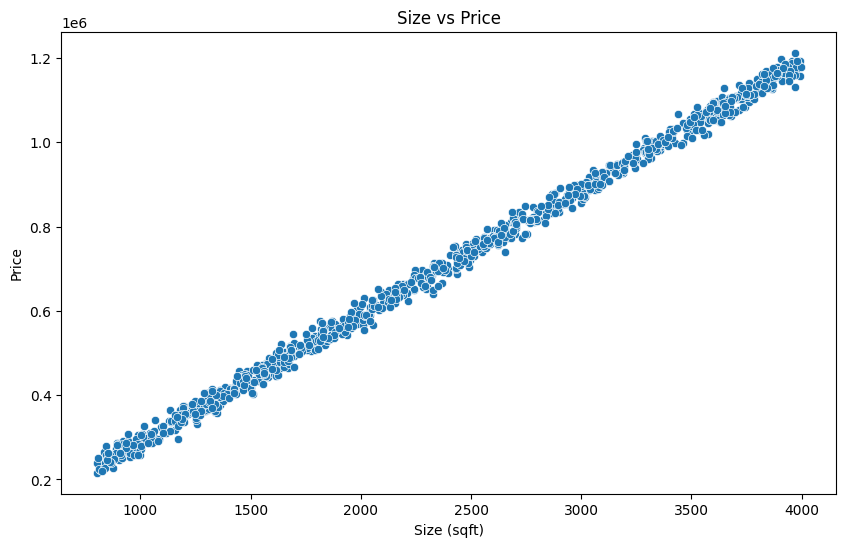

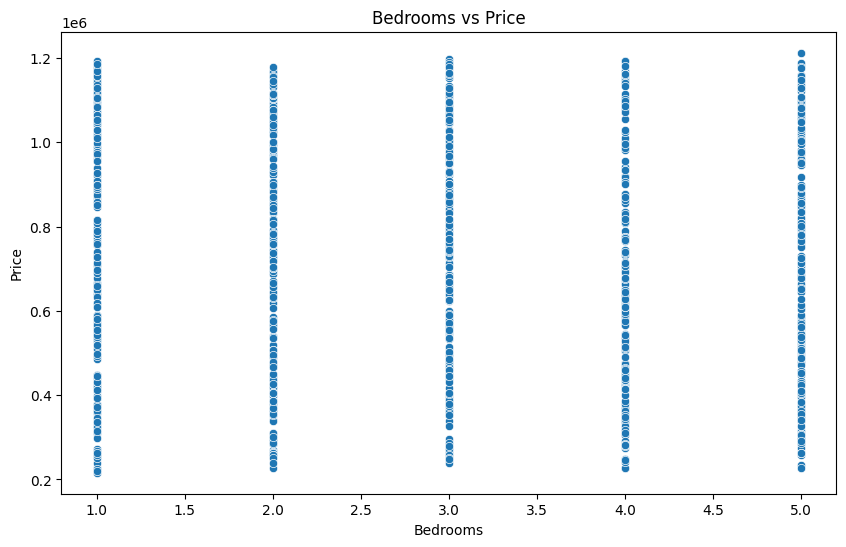

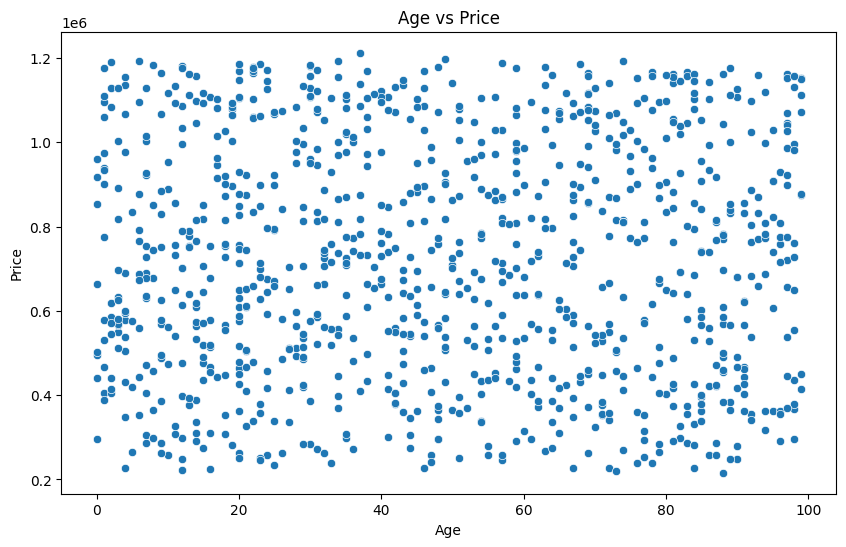

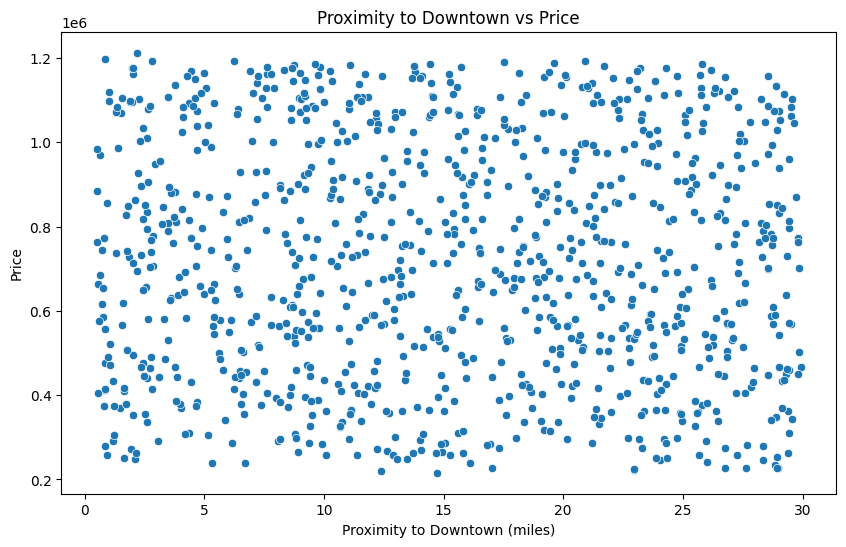

In [26]:
# Scatter plot for Size vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size (sqft)', y='Price', data=data)
plt.title('Size vs Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.show()

# Scatter plot for Bedrooms vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bedrooms', y='Price', data=data)
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

# Scatter plot for Age vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Price', data=data)
plt.title('Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

# Scatter plot for Proximity to Downtown vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', data=data)
plt.title('Proximity to Downtown vs Price')
plt.xlabel('Proximity to Downtown (miles)')
plt.ylabel('Price')
plt.show()

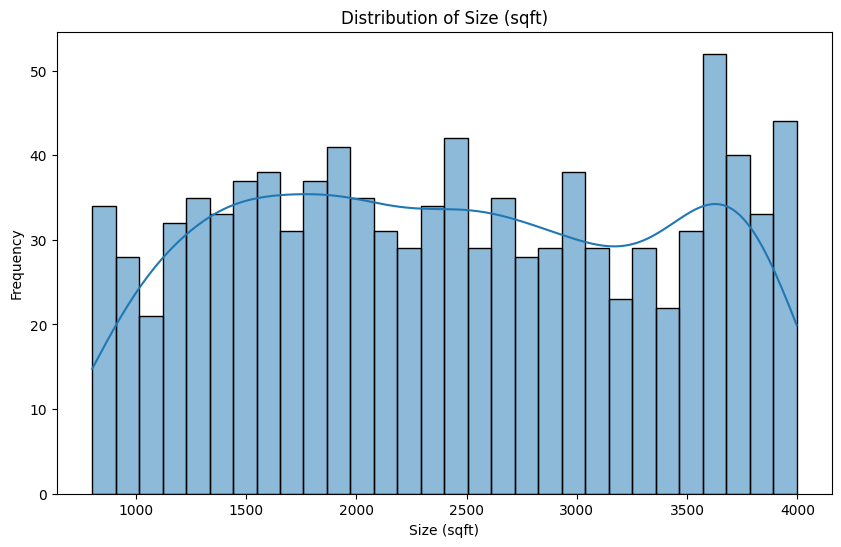

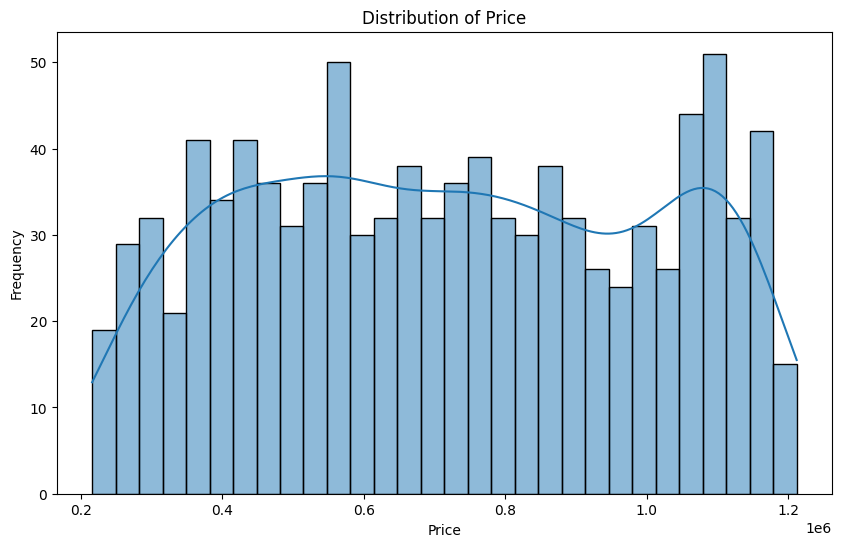

In [27]:
# Histogram for Size
plt.figure(figsize=(10, 6))
sns.histplot(data['Size (sqft)'], bins=30, kde=True)
plt.title('Distribution of Size (sqft)')
plt.xlabel('Size (sqft)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

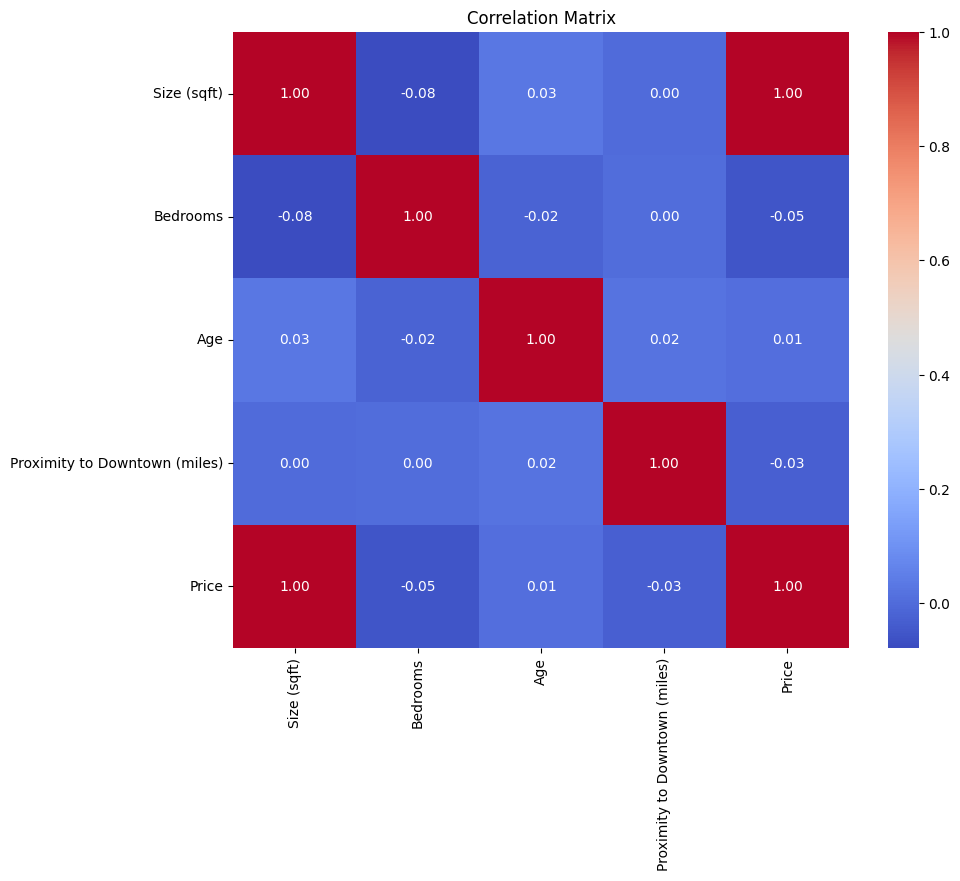

In [28]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# **2. Data Preprocessing:**

In [29]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Fill missing values with the mean (or median) for numerical columns
data.fillna(data.mean(), inplace=True)

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [30]:
# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)', 'Price']

# Apply standardization
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# **3. Model Development:**

In [31]:
# Define features and target variable
X = data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.0012888852550330795
R^2 Score: 0.9986314443568995


In [33]:
# Get the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                               Coefficient
Size (sqft)                       1.000477
Bedrooms                          0.024403
Age                              -0.021815
Proximity to Downtown (miles)    -0.030339


# **4. Model Evaluation:**

In [34]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')
print(f'Adjusted R-squared: {adjusted_r_squared}')

Mean Squared Error: 0.0012888852550330795
R-squared: 0.9986314443568995
Adjusted R-squared: 0.9986128876702134


In [35]:
# Get the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                               Coefficient
Size (sqft)                       1.000477
Bedrooms                          0.024403
Age                              -0.021815
Proximity to Downtown (miles)    -0.030339


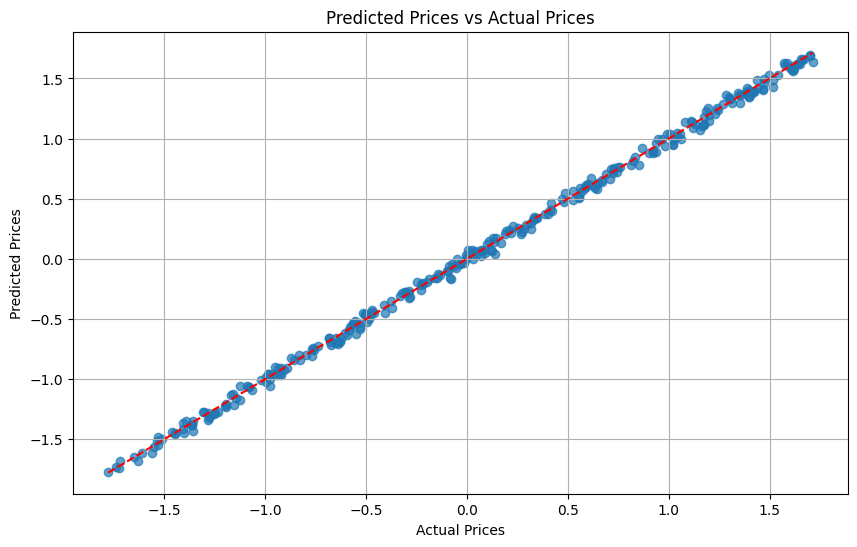

In [36]:
# Plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line of equality
plt.title('Predicted Prices vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()

# **Report:**

Report on House Prices Prediction Model

**1. Introduction**
This report documents the process of developing a multiple regression model to predict house prices based on various features such as size, number of bedrooms, age, and proximity to downtown. The dataset used for this analysis is datasets_house_prices.csv, which contains relevant information regarding house characteristics and prices.

**2. Data Preprocessing**

***Steps Taken:***
**Loading the Data:** The dataset was loaded into a Pandas DataFrame for analysis.

**Handling Missing Data:** Checked for missing values and filled any missing entries with the mean of the respective columns.

**Standardizing the Data:** Normalized the features using standardization to ensure all features were on a similar scale.

**Splitting the Data:** The dataset was split into training (70%) and testing (30%) sets.

**3. Model Development**

**Steps Taken:**

**Model Implementation:** A multiple regression model was developed using Scikit-learn's LinearRegression.

**Model Predictions:** Predictions were made on the test set.

**4. Model Evaluation**

**Performance Metrics:**

**Mean Squared Error (MSE):** Calculated to assess the average squared difference between predicted and actual prices.

**R-squared:** Indicates the proportion of variance in the dependent variable explained by the independent variables.

**Adjusted R-squared:** Adjusted for the number of predictors in the model.

**Coefficients Interpretation:**
The coefficients of the model were analyzed to understand the impact of each feature on house prices. For instance, a positive coefficient for Size (sqft) indicates that larger houses tend to have higher prices.

**Visualization:** Predicted prices were plotted against actual prices to visualize model accuracy.

**5. Challenges Faced**

**Missing Data:** Initially, missing values were present in the dataset. This was resolved by filling missing values with the mean, which may not always be the best approach depending on the data distribution.

**Feature Scaling:** Ensuring all features were on a similar scale was crucial for model performance. Standardization was chosen to mitigate the impact of outliers.

**Model Overfitting:** During model evaluation, care was taken to ensure that the model was not overfitting the training data. Cross-validation could be implemented for further validation.

**6. Conclusion**
The developed multiple regression model shows promise in predicting house prices based on the features provided. The evaluation metrics indicate a reasonable fit, with R-squared values suggesting that the model explains a significant portion of the variance in house prices.

Applicability in Real-World Scenarios: This model can be applied in real estate to assist buyers and sellers in understanding market trends and pricing. It can also be useful for real estate agencies in pricing strategies.

Limitations: The model's performance is limited by the features included. Additional factors such as location specifics, market conditions, and economic indicators could enhance predictive accuracy. Furthermore, the model assumes a linear relationship between features and price, which may not capture more complex interactions.

This report provides a comprehensive overview of the steps taken in data preprocessing, model development, evaluation, and the challenges faced during the process. Future work could focus on enhancing the model through feature engineering and exploring more complex modeling techniques.